In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lc_classifier.utils import LightcurveBuilder

# Build a synthetic lightcurve

LightcurveBuilder is an auxiliary object that helps you building a Pandas dataframe that is compatible with our library. With LightcurveBuilder you can add as many bands (filters) as you have.

In the following example we will build a synthetic sinusoidal lightcurve that was observed in three bands: u, g and r.

In [60]:
bands = ['u', 'g', 'r']
true_period = 0.37
lightcurve_builder = LightcurveBuilder('lc_001')
for band in bands:
    n_obs_band = np.random.randint(15, 30)
    time = np.random.rand(n_obs_band) * 700
    magnitude = 17.0 + 0.3 * np.sin(time*2*np.pi/true_period)
    error = np.random.randn(n_obs_band) ** 2 * 0.3 + 0.05
    error = np.clip(error, 0.0, 0.4)
    magnitude += np.random.randn(n_obs_band) * error

    lightcurve_builder.add_band(
        band,
        time,
        magnitude,
        error)

lightcurve = lightcurve_builder.build_dataframe()
lightcurve

,time,magnitude,error,band
oid,,,,
lc_001,57.739083,16.893598,0.400000,u
lc_001,631.528109,16.672637,0.400000,u
lc_001,482.667024,16.829901,0.222251,u
lc_001,603.333876,16.815710,0.111251,u
lc_001,79.814941,16.684632,0.055604,u
lc_001,67.056887,17.281457,0.199456,u
lc_001,285.428122,17.148374,0.063501,u
lc_001,466.909697,16.921926,0.111509,u
lc_001,220.224274,17.072642,0.204468,u


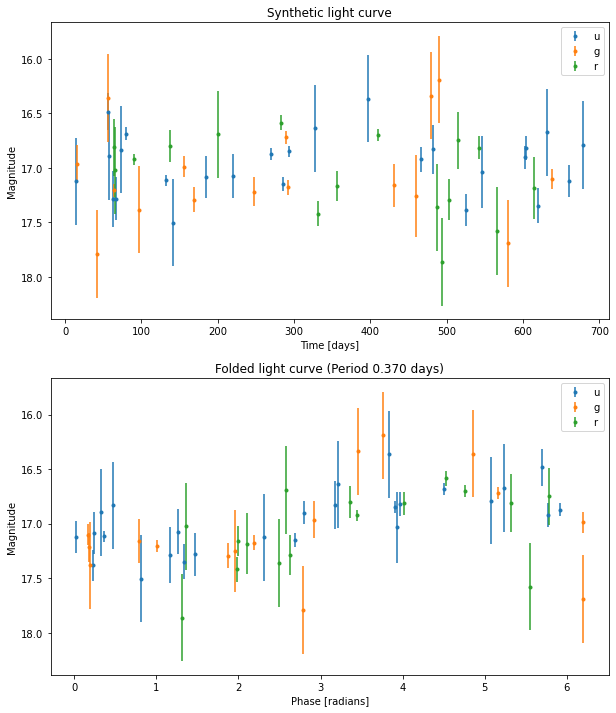

In [61]:
fig = plt.figure(figsize=(10, 12))
fig.set_facecolor('white')

plt.subplot(2, 1, 1)
for band in bands:
    obs_in_band = lightcurve[lightcurve.band == band]
    plt.errorbar(
        obs_in_band.time,
        obs_in_band.magnitude,
        yerr=obs_in_band.error,
        fmt='.',
        label=band
    )

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('Synthetic light curve')
plt.legend()
plt.gca().invert_yaxis()

plt.subplot(2, 1, 2)
for band in bands:
    obs_in_band = lightcurve[lightcurve.band == band]
    plt.errorbar(
        (obs_in_band.time % true_period) / true_period * 2 * np.pi,
        obs_in_band.magnitude,
        yerr=obs_in_band.error,
        fmt='.',
        label=band
    )

plt.xlabel('Phase [radians]')
plt.ylabel('Magnitude')
plt.title(f'Folded light curve (Period {true_period:.3f} days)')
plt.legend()
plt.gca().invert_yaxis()

plt.show()

# Compute features from lightcurve

Our library has many available feature extractors inside the features module. You can combine them using a FeatureExtractorComposer object.

In [48]:
from lc_classifier.features import MHPSExtractor, PeriodExtractor, GPDRWExtractor
from lc_classifier.features import FoldedKimExtractor
from lc_classifier.features import HarmonicsExtractor, IQRExtractor
from lc_classifier.features import PowerRateExtractor
from lc_classifier.features import TurboFatsFeatureExtractor

from lc_classifier.features import FeatureExtractorComposer

In [49]:
feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
)

To compute the features we give the dataframe with observations to the compute_features method of our feature extractor. The features appear as columns and the different objects as rows.

In [64]:
features = feature_extractor.compute_features(lightcurve)
features

,MHPS_ratio_u,MHPS_low_u,MHPS_high_u,MHPS_non_zero_u,MHPS_PN_flag_u,MHPS_ratio_g,MHPS_low_g,MHPS_high_g,MHPS_non_zero_g,MHPS_PN_flag_g,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,Multiband_period,PPE,Period_band_u,delta_period_u,Period_band_g,delta_period_g,Period_band_r,delta_period_r,GP_DRW_sigma_u,GP_DRW_tau_u,GP_DRW_sigma_g,GP_DRW_tau_g,GP_DRW_sigma_r,GP_DRW_tau_r,Psi_CS_u,Psi_eta_u,Psi_CS_g,Psi_eta_g,Psi_CS_r,Psi_eta_r,Harmonics_mag_1_u,Harmonics_mag_2_u,Harmonics_mag_3_u,Harmonics_mag_4_u,Harmonics_mag_5_u,Harmonics_mag_6_u,Harmonics_mag_7_u,Harmonics_phase_2_u,Harmonics_phase_3_u,Harmonics_phase_4_u,Harmonics_phase_5_u,Harmonics_phase_6_u,Harmonics_phase_7_u,Harmonics_mse_u,Harmonics_mag_1_g,Harmonics_mag_2_g,...,AndersonDarling_g,Autocor_length_g,Beyond1Std_g,Con_g,Eta_e_g,Gskew_g,MaxSlope_g,Mean_g,Meanvariance_g,MedianAbsDev_g,MedianBRP_g,PairSlopeTrend_g,PercentAmplitude_g,Q31_g,Rcs_g,Skew_g,SmallKurtosis_g,Std_g,StetsonK_g,Pvar_g,ExcessVar_g,SF_ML_amplitude_g,SF_ML_gamma_g,IAR_phi_g,LinearTrend_g,Amplitude_r,AndersonDarling_r,Autocor_length_r,Beyond1Std_r,Con_r,Eta_e_r,Gskew_r,MaxSlope_r,Mean_r,Meanvariance_r,MedianAbsDev_r,MedianBRP_r,PairSlopeTrend_r,PercentAmplitude_r,Q31_r,Rcs_r,Skew_r,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,SF_ML_amplitude_r,SF_ML_gamma_r,IAR_phi_r,LinearTrend_r
oid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
lc_001,25.632067,0.711528,0.027759,7.0,0.0,NaN,NaN,NaN,NaN,NaN,43004.875,2.299204,0.000053,1.0,1.0,0.369973,0.006475,0.369973,0.0,0.369973,0.0,0.922509,0.552536,0.031097,2.403919,0.032604,0.114993,0.072971,10.709986,0.245857,0.848101,0.274114,1.657285,0.223118,1.320414,0.225715,0.153389,0.056965,0.130737,0.049163,0.147006,0.094506,5.050308,3.971972,0.388282,2.407671,1.737833,3.585032,0.020806,13.511284,15.175022,...,0.934604,1.0,0.3125,0.0,1.285472,-0.354137,0.271567,17.0513,0.025807,0.192179,0.4375,-0.033333,0.056919,0.361811,0.223941,-0.468919,0.378071,0.440048,0.794599,1.0,0.000401,0.362032,-0.204365,9.777704e-10,-0.000278,0.638667,0.784212,1.0,0.3125,0.0,0.42625,0.502581,0.242449,17.05891,0.020759,0.246774,0.125,-0.1,0.052439,0.519595,0.269018,0.651289,0.233588,0.35413,0.768994,1.0,0.000189,0.241004,-0.24544,0.885925,0.000855


Let's check if the computed period is similar to the true period that we used to build our synthetic light curve.

In [65]:
period_feature_names = [f for f in features.columns if 'period' in f.lower()]
features[period_feature_names]

,Multiband_period,Period_band_u,delta_period_u,Period_band_g,delta_period_g,Period_band_r,delta_period_r
oid,,,,,,,
lc_001,0.369973,0.369973,0.0,0.369973,0.0,0.922509,0.552536
